In [1]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
mars_temps = pd.read_html(url)

In [4]:
# Display the data that is currently a list. NOTE: temperatures listed in Celsius 
mars_temps

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [5]:
# Convert the HTML list into a Dataframe
mars_temps_df = mars_temps[0]

In [6]:
# Validate that the list has been converted to a dataframe
mars_temps_df.sample(10)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
387,405,2013-11-03,442,44,2,-80.0,900.0
1851,1880,2018-02-12,1962,128,5,-78.0,738.0
1167,1193,2016-02-23,1262,112,4,-81.0,790.0
1033,1059,2015-10-09,1128,52,2,-79.0,902.0
329,346,2013-09-04,384,16,1,-77.0,875.0
1619,1646,2017-06-17,1729,20,1,-76.0,858.0
1666,1696,2017-08-04,1776,42,2,-79.0,877.0
695,717,2014-10-11,775,211,8,-71.0,838.0
323,339,2013-08-29,378,13,1,-78.0,869.0
723,744,2014-11-09,803,229,8,-69.0,888.0


In [7]:
# Display the current datatypes for each column
mars_temps_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [8]:
# Convert data type for column "Terrestrial_date" to datetime
mars_temps_df['terrestrial_date'] = pd.to_datetime(mars_temps_df['terrestrial_date'])

In [9]:
# Validate the datatype changed for the specified column
mars_temps_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [10]:
# Close the browser created in this script, the data is now stored as a DataFrame
browser.quit()

In [14]:
# Deliverable 2: Scrape and Analyze Mars Weather Data 
# Question 5, Part 1 >> How many months exist on Mars?
num_mars_mths = mars_temps_df['month'].nunique()
print(f'There are', num_mars_mths, 'month''s in a Martian solar year')

There are 12 months in a Martian solar year


In [15]:
# Deliverable 2: Scrape and Analyze Mars Weather Data 
# Question 5, Part 2 >> How many Martian (and not Earth) days worth of data exist in the scraped dataset
num_mars_days = mars_temps_df['sol'].nunique()
print(f'There are', num_mars_days,'unique days in this dataset')

There are 1867 unique days in this dataset


Using the chart provided the coldest month was found in the 3rd month and the warmest found to be 8th month.


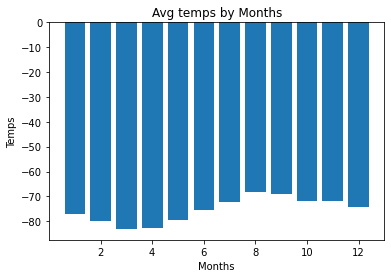

In [13]:
# Deliverable 2: Scrape and Analyze Mars Weather Data 
# Question 5, Part 3 >> What are the coldest and the warmest months on Mars (at the location of Curiosity)?
# Plot the results as a bar chart.

# mars_month_coldest = mars_month_temps['min_temp'].groupby(mars_month_temps['month']).mean()
mars_month_coldest = mars_temps_df.groupby('month').mean('min_temp')

# Create Range for months using Index, this converts the "group by" into a series which can be plotted
x_axis_months = pd.Series(range(1,mars_month_coldest['id'].count() + 1))

# Create labels for the x and y axis
plt.xlabel("Months")
plt.ylabel("Temps")
# Create Title
plt.title("Avg temps by Months")
# Display the completed Bar chart
plt.bar(x_axis_months, mars_month_coldest['min_temp'])

print(f'Using the chart provided the coldest month was found in the 3rd month and the warmest found to be 8th month.')

Using the chart provided the month with the higest pressure was the 9th month, the month with the least was the 6th.


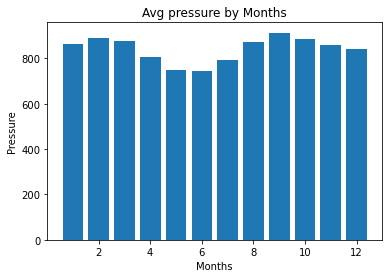

In [15]:
# Deliverable 2: Scrape and Analyze Mars Weather Data 
# Question 5, Part 4 >> Which months have the lowest and the highest atmospheric pressure on Mars?
# Plot the results as a bar chart.

# Returns a DF
mars_avg_pressure = mars_temps_df.groupby('month').mean('pressure')

# Create Range for months using Index, this converts the "group by" into a series which can be plotted
x_axis_months = pd.Series(range(1,mars_avg_pressure['id'].count() + 1))

# Create labels for the x and y axis
plt.xlabel("Months")
plt.ylabel("Pressure")

# Create Title for chart
plt.title("Avg pressure by Months")

# Display completed bar chart
plt.bar(x_axis_months, mars_avg_pressure['pressure'])

print(f'Using the chart provided the month with the higest pressure was the 9th month, the month with the least was the 6th.')

Text(0.5, 1.0, 'Lowest Daily Temperatures')

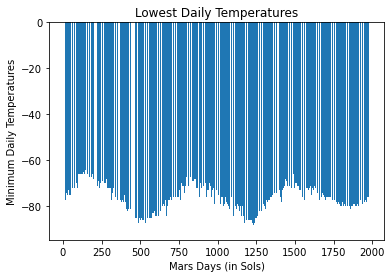

In [72]:
# Deliverable 2: Scrape and Analyze Mars Weather Data 
# Question 5, Part 5 >> About how many terrestrial (Earth) days exist in a Martian year? 
# That is, in the time that Mars circles the Sun once, how many days elapse on Earth?
get_days_year = pd.to_datetime(mars_temps_df['terrestrial_date']).dt.to_period('Y').nunique()
get_days_year

# Visually estimate the result by plotting the daily minimum temperature.
plt.bar(mars_temps_df['sol'], mars_temps_df['min_temp'])

# Create X & Y Labels
plt.xlabel('Mars Days (in Sols)')
plt.ylabel('Minimum Daily Temperatures')

# Create Chart title
plt.title('Lowest Daily Temperatures')